# Predictong Diabetes
## Inport Libraries

In [1]:
import pandas as pd                # pandas is a dataframe library
import matplotlib.pyplot as plt    # matplotlib.pyplot plots data
import numpy as np                 # numpy provides N-dim object support

# do plotting inline instead of in a separate window
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
plt.style.use('seaborn-colorblind')
%matplotlib inline

Load and Review data

In [2]:
df = pd.read_csv("./data/pima-data.csv")           # load Pima data. Adjust path as necessary

In [3]:
df.shape

(768, 10)

In [4]:
df.head(5)                   # Notice the data frame uses colum names to acess colums in a data frame

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [5]:
df.tail(5)                 # Notice the data frame uses a ZERO based index for identitying rows

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
763,10,101,76,48,180,32.9,0.171,63,1.8912,False
764,2,122,70,27,0,36.8,0.340,27,1.0638,False
765,5,121,72,23,112,26.2,0.245,30,0.9062,False
766,1,126,60,0,0,30.1,0.349,47,0.0000,True
767,1,93,70,31,0,30.4,0.315,23,1.2214,False


### Definition of features

From the metadata on the data source we have the following definition of the features.

| Feature          | Description                                  | Comments
|------------------|----------------------------------------------|---------------------------------------------
| num_preg         | Number of pregnancies                        |
| glucose_conc     | Plasma glucose concentrationon a 2 hours in an oral glucose tolerance test
| diastolic_bp     | Diastolic blood pressure (mm Hg)             |
| thickness        | Triceps skin fold thickness (mm)             |
| insulin          | 2-Hour serum insulin (mu U/ml)               |
| bmi              | Body mass index (weight in kg/(height in m)^2|
| diab_pred        | Diabetes pedigree function                   |
| age              | Age (years)                                  |
| skin             | what is this? - Pigmentation index?          |                                |
| diabetes         | Class variable (1=true, 0=Flse)              |

### Columns to Eliminate
Not used
No values
Duplicates
Correlated Columns : Same information in a different format --- Add little information
Correlated Columns : Can cause algorithms to get confused

### Check for null values

In [6]:
df.isnull().values.any()

False

### Check for Correlated Values

In [7]:
def plot_corr(df,size=11):
    """
    Function plots a graphical correlation matrix for each pair of columns in the dataframe.
    
    Input:
      df: pandas DataFrame
      size: vertical and horizontal size of the plot
      
    Displays:
      matrix of correlation between columns. Blue-cyan-yellow-red-darkred => less to more correlated
                                             0 -------------------> 1
                                             Expect a darkred line running from top left to bottom right
    """
    
    corr = df.corr()                         # data frame correlation function
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)                         # color code the rectangles by correlation value
    plt.xticks(range(len(corr.columns)), corr.columns)    # draw x tick marks
    plt.yticks(range(len(corr.columns)), corr.columns)    # draw y tick marks

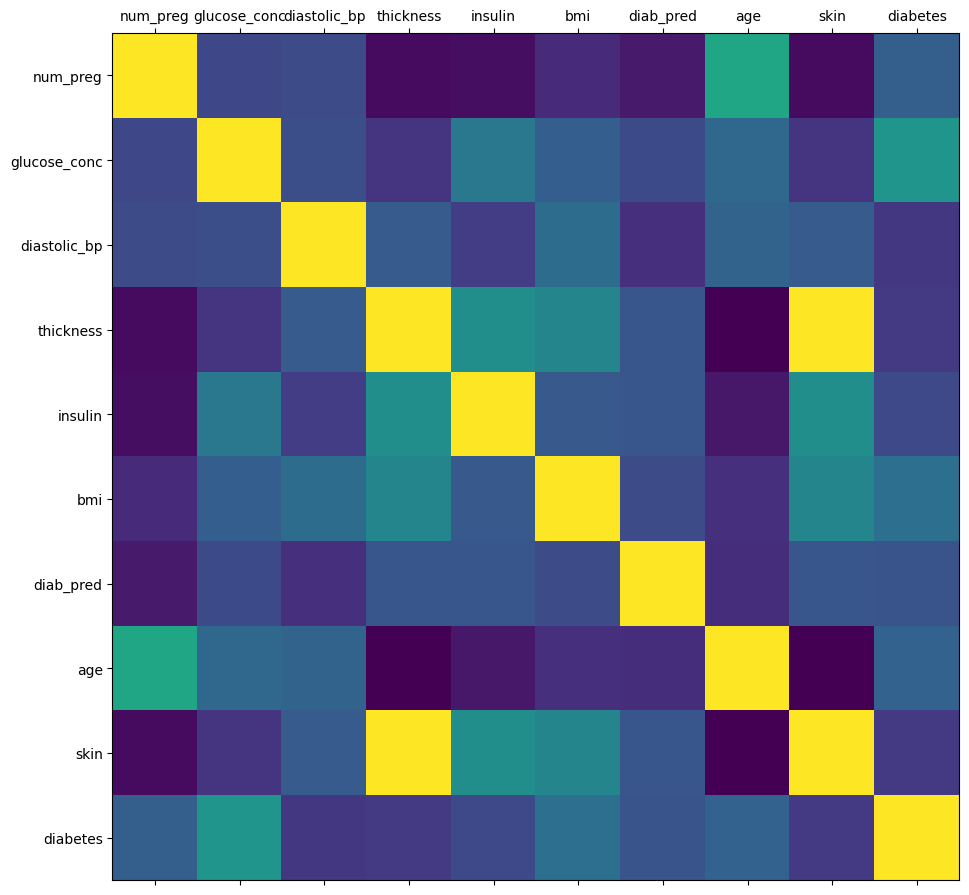

In [8]:
plot_corr(df)

### Check correlation coefficients of the correlation matrix vizualization

In [9]:
df.corr()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
num_preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,-0.081672,0.221898
glucose_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.057328,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.207371,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.436783,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.392573,0.292695
diab_pred,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.183928,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,-0.113970,0.238356
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,0.074752,1.000000


Correlation coefficient of 1 indicates a perfect correlation (notice the same variables are 1)

Notice Thickness and Skin have a perfect correlation with a correlation coefficient of 1. these variables do not
add additional value 

Notice: thickness and skin should not be used at the same time. One of them can be used but not both at the same time, one needs to be dropped

It turns out that sking was calculated based on the value of thickness thus skin should be dropped.

In [10]:
del df['skin']                          # To delete the skin column from the dataframe

In [11]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False
2,8,183,64,0,0,23.3,0.672,32,True
3,1,89,66,23,94,28.1,0.167,21,False
4,0,137,40,35,168,43.1,2.288,33,True


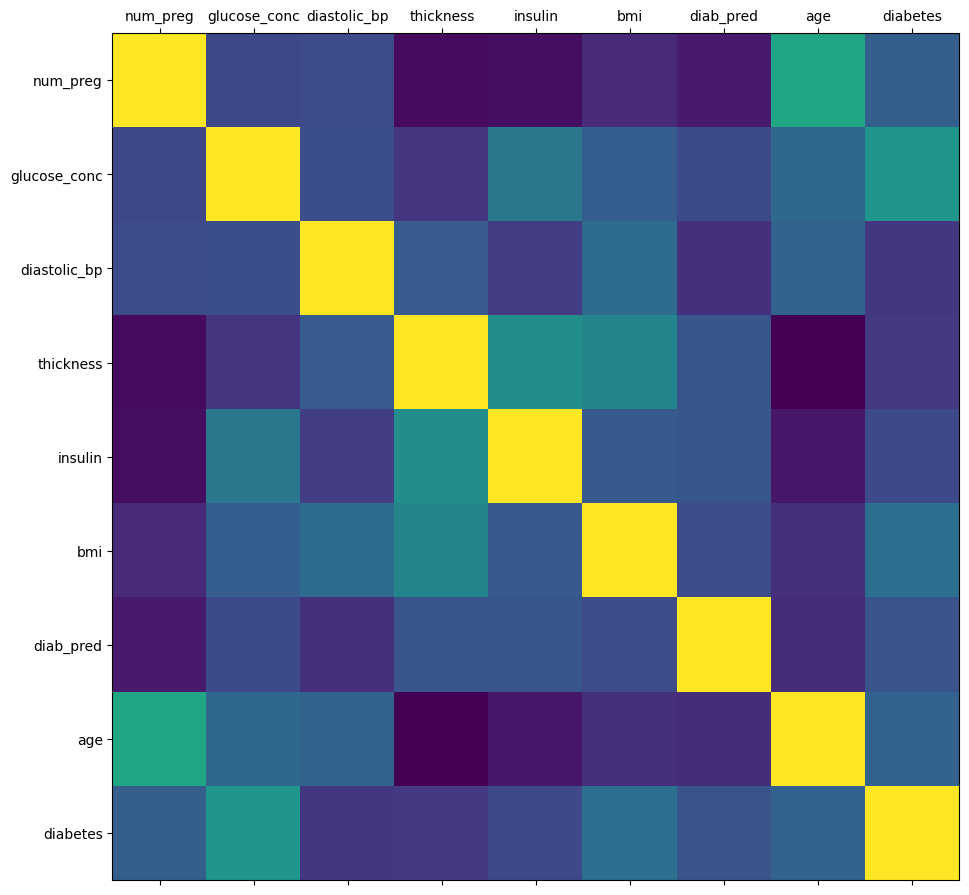

In [12]:
plot_corr(df)        # Re-check the nplot to ensure that there are no addition correlated columns

Now the plot does not show any other correlated columns

### Molding the Data

This step will involve Adjusting Data Type and Creating new columns, if required

### Check Data Types

In [13]:
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False
2,8,183,64,0,0,23.3,0.672,32,True
3,1,89,66,23,94,28.1,0.167,21,False
4,0,137,40,35,168,43.1,2.288,33,True


We have numeric data, except for a categorical data for diabetes. This column needs to change to 0 or 1

In [14]:
diabetes_map = {True : 1, False : 0}

In [15]:
df['diabetes'] = df['diabetes'].map(diabetes_map)    # to change the values as specified in the map object

In [16]:
df.head(5)      # Check to see if the diabetes column change to 0 or 1

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Check true/false ratio

In [17]:
num_true = len(df.loc[df['diabetes'] == True])
num_false = len(df.loc[df['diabetes'] == False])

In [18]:
print("Number of True cases: {0} ({1:2.2f}%)".format(num_true, (num_true/ (num_true + num_false)) * 100))
print("Number of False cases: {0} ({1:2.2f}%)".format(num_true, (num_false/ (num_true + num_false)) * 100))

Number of True cases: 268 (34.90%)
Number of False cases: 268 (65.10%)


With 35% True and 65% false standard prediction techniques can be used

### Selecting an Algorithm

Review the Objective statement for the Machine Learning Project:

"Use the Machine Learning Workflow to process and trensform Pima Indian data to cre a *prediction model*. This model must predict which people are likely to develop diabetes with *70% or greater accuracy*."

This statement suggests a Prediction Model => Supervised machine learning

Based on the result type, we have two options Regression or classification

The regression result has continuous values, where as Classification has discrete values (e.g., small, medion, large)

Based on the requirement "..predict which people are likely to develop diabetes..." The result type is Binary (True / False). Consequently, the algorithm must support classification (binary classification). That narrows the number of algirthms to 20

Based on complexisty we have a choiuce of Basic (keep it simple) vs Enhanced algorithms ("Ensemble algorithms" with a container algorithm, multiple child algorithms and Boost performance. These to be very complex)

Candidate algorithms are 
  Naive Bayes (Based on likelihood and probability-assumes each feature variable has the same weight. It requires a small
               amount of data to train the model)
  Logistic Regression (Returns a binary result; the relationship to features are weighted)
  Decision Tree (Uses a Binary Tree, each Node contains a decision; requires enough data to determine nodes and splits)

Lets select "Naibe Bayes" because:
  Simple - easy to understand
  Fast - up to 100x faster
  The algirithm is Stable to data changes
  

### Training the Model Overview

Split the PREPARED DATA into a Training Dataset (70%) and a Testing dataset (30%)

The sckit-learn library will be used to perform our predictions. It has the following features:
  Designed to work with mumpy, scipy, and pandas
  Toolset for training and evaluation tasks:
    Data splitting
    Pre-Processing
    Feature selection
    Model training
    Model tuning
   Common interface across algorithms

### Splitting the data

70% for training, and 30% for testing

In [19]:
from sklearn.model_selection import train_test_split

feature_col_names = ['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin', 'bmi', 'diab_pred', 'age']
predicted_class_names = ['diabetes']

x = df[feature_col_names].values                 # predictor feature columns (8 X m)
y = df[predicted_class_names]. values            # predicted class (1=true, 0=false) column (1 X m)
split_test_size = 0.30

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=split_test_size, random_state=42)
                                   # test_size = 0.3 is 30%, 42 is the answer to everything (seed for random generation)

Check to ensure we have the desired 70% traing, 30% test split of the data

In [20]:
print("{0:0.2f}% in training set".format((len(x_train)/len(df.index)) * 100))
print("{0:0.2f}% in test set".format((len(x_test)/len(df.index)) * 100))

69.92% in training set
30.08% in test set


### Verify that predicted values was split correctly

In [21]:
print("Original True  : {0} ({1:0.2f}%)".format(len(df.loc[df['diabetes'] == 1]), (len(df.loc[df['diabetes'] == 1])/len(df.index)* 100)))
print("Original False : {0} ({1:0.2f}%)".format(len(df.loc[df['diabetes'] == 0]), (len(df.loc[df['diabetes'] == 0])/len(df.index)* 100)))
print("")
print("Training True  : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)* 100)))
print("Training False : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)* 100)))
print("")
print("Test True  : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)* 100)))
print("Test False : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)* 100)))


Original True  : 268 (34.90%)
Original False : 500 (65.10%)

Training True  : 188 (35.01%)
Training False : 349 (64.99%)

Test True  : 80 (34.63%)
Test False : 151 (65.37%)


The propertions between the original, traing and test datasets has been maintained; therefore, we can proceed

### Post-split Data Preparation

#### Hidden Missing Values


In [22]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Notice. On the 3rd row thickness has a value 0; 0 was entered for a missing value

How many rows have unexpected 0 values (missing or null values)

In [23]:
print("# rows in dataframe {0}".format(len(df)))
print("#rows missing glucose_con: {0}".format(len(df.loc[df['glucose_conc'] == 0])))
print("#rows missing diastolic_bp: {0}".format(len(df.loc[df['diastolic_bp'] == 0])))
print("#rows missing thickness: {0}".format(len(df.loc[df['thickness'] == 0])))
print("#rows missing insulin: {0}".format(len(df.loc[df['insulin'] == 0])))
print("#rows missing bmi: {0}".format(len(df.loc[df['bmi'] == 0])))
print("#rows missing diab_pred: {0}".format(len(df.loc[df['diab_pred'] == 0])))
print("#rows missing age: {0}".format(len(df.loc[df['age'] == 0])))

# rows in dataframe 768
#rows missing glucose_con: 5
#rows missing diastolic_bp: 35
#rows missing thickness: 227
#rows missing insulin: 374
#rows missing bmi: 11
#rows missing diab_pred: 0
#rows missing age: 0


#### What do we do about the miising values:
 
It is a common problem
Options:
  - Ignore
  - Drop observations (rows)
  - Replace values (Imput - entering some resonable value like: mean or median)
 
 Data numbers
  - 768 Rows
  - 374 missing insulin values
  - Can we igonre/delete almost 50% of the data? - Most likely NO
  - That means we need to replace thosse 0 forwith something

#### Impute with the mean

In [24]:
# from sklearn.preprocessing import Imputer   # Has been Deprecated
from sklearn.impute import SimpleImputer

#Impute with mean all 0 readings

# fill_0 = SimpleImputer(missing_values=0, strategy="mean", axis=0)   # SimpleImputer does not have "axis" parameter
fill_0 = SimpleImputer(missing_values=0, strategy="mean")

In [25]:
x_train = fill_0.fit_transform(x_train)
x_test = fill_0.fit_transform(x_test)

### Training Initial Algorithm - Naive Bayes

In [26]:
from sklearn.naive_bayes import GaussianNB

# create Gaussian Naive Bayes model object and train it with data
nb_model = GaussianNB()      # The Gaussian curbe looks like the normal bell curbe with most of the data around the mean

nb_model.fit(x_train, y_train.ravel())

GaussianNB()

The Naive Baysean model has been created and trained

### Performance on Training Data

In [27]:
# Predict values using the training data
nb_predict_train = nb_model.predict(x_train)

# import the performance metrics library
from sklearn import metrics

# Accuracy
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, nb_predict_train)))

Accuracy: 0.7542


### Performance on Testing Data

In [28]:
nb_predict_test = nb_model.predict(x_test)

from sklearn import metrics

# training metrics
print("Accuracy {0:.4f}".format(metrics.accuracy_score(y_test, nb_predict_test)))

Accuracy 0.7359


### Metrics related to evaluation
The Goal was to predict diabetes with a 70% accuracy or greater

In [29]:
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test, nb_predict_test)))
print("")

print("Classification Report")
print(metrics.classification_report(y_test, nb_predict_test))

Confusion Matrix
[[118  33]
 [ 28  52]]

Classification Report
              precision    recall  f1-score   support

           0       0.81      0.78      0.79       151
           1       0.61      0.65      0.63        80

    accuracy                           0.74       231
   macro avg       0.71      0.72      0.71       231
weighted avg       0.74      0.74      0.74       231



The confusion metrix shows 28 False Negatives and 33 False Positives. Ideally we would like to se both of these vales to be 0
Recall - Is the True Positive, the value in this case is 0.65 or 65% Recall = (TP / (TP + FN) - Ideally it should be 70% or greater
Precision - Defined as Precision = TP / (TP + FP) in our case is 0.61 or 61%

A way to improve the model is to use Hyperparameters but the Naive Bayes model does not suppor them
Another way is to get more data or improve the data
Another way is to improve training
Final option is to select another algorithm that works better with the data available

### Chosing another Algorithm

Lets use Random Forest 
- Its is based on Decision Trees
- It is an Ensemble Algorithm'- Fits multiple trees with subsets of data
- Averages tree results to improve performance abd control overfiting

## Random Forest

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score
#rf_model = RandomForestClassifier(random_state=42)       # Create the random foest object
#rf_model.fit(x_train, y_train.ravel())

In [31]:
# redefining x and y

x = df[feature_col_names].values                 # predictor feature columns (8 X m)
y = df[predicted_class_names]. values            # predicted class (1=true, 0=false) column (1 X m)

In [32]:
# redefining testing data sets using raw data sets
# creating x test, x train and y test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 42)

In [33]:
def modeltraintest(vartrain, vartest, y_train, y_test, model):
#Fit the model
    model.fit(vartrain, y_train)
#Predict with the model
    model_pred = model.predict(vartest)
    model_prob = model.predict_proba(vartest)
#Assess with the model
    score = model.score(vartest, y_test)
    print('XXXXXXXXXXXXXXXX ACCURACY SCORE XXXXXXXXXXXXXXXXXX')
    print(round(score, 6))
    print("")
    print('XXXXXXXXXXXXXXXX CONFUSION MATRIX XXXXXXXXXXXXXXXX')
    print(confusion_matrix(y_test, model_pred))
    print("")
    print('XXXXXXXXXXXXXX CLASSIFICATION REPORT XXXXXXXXXXXXXX')
    print(classification_report(y_test, model_pred))
    print('')
    print('XXXXXXXXXXXXXX ROC AUC SCORE AND CHART XXXXXXXXXXXXXXXXXX')
    print('')
    y_pred_prob = model.predict_proba(vartest)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    plt.plot([0, 1], [0, 1],'k--')
    plt.plot(fpr, tpr, label='Model')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC AUC Curve')
    plt.show();
# calculate roc curve
    y_pred_prob = model.predict_proba(vartest)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    roc_auc = roc_auc_score(y_test, y_pred_prob)
    roc_auc_format = 'ROC AUC Score: {0:.4f}'.format(roc_auc)
    print(roc_auc_format)
    print('')
    print('XXXXXXXXXXXXXX CROSS VALIDATION XXXXXXXXXXXXXXXXXX')
    print('')
    cv_scores = cross_val_score(model, vartrain, y_train, cv=5,
    scoring='accuracy')
    print('CV Accuracy Scores:')
    print(cv_scores)
    print('')
    cv_rocauc = cross_val_score(model, vartrain, y_train, cv=5,
    scoring='roc_auc')
    print('CV ROC AUC:')
    print(cv_rocauc)
    print('')
    print('XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX')

In [38]:
# defining shorttraintest variable


def shorttraintest(vartrain, vartest, y_train, y_test, model):

    #Fit the model
    model.fit(vartrain, y_train)

    #Predict with the model

    model_pred = model.predict(vartest)

    model_prob = model.predict_proba(vartest)

    print('Confusion Matrix:')

    print(confusion_matrix(y_test, model_pred))

    print("")

    #Assess with the model

    score = model.score(vartest, y_test)

    score_format = 'Accuracy Score: {0:.4f}'.format(score)

    print(score_format)

    recall = recall_score(y_test, model_pred)

    recall_format = 'Recall Score: {0:.4f}'.format(recall)

    print(recall_format)

    precision = precision_score(y_test, model_pred)

    precision_format = 'Precision Score: {0:.4f}'.format(precision)

    print(precision_format)
# calculate roc curve

y_pred_prob = model.predict_proba(vartest)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)
roc_auc_format = 'ROC AUC Score: {0:.4f}'.format(roc_auc)
print(roc_auc_format)
print('')

ROC AUC Score: 0.8070



iteration 6 done. Accuracy = 0.7359307359307359
iteration 8 done. Accuracy = 0.7489177489177489
iteration 10 done. Accuracy = 0.7402597402597403
iteration 12 done. Accuracy = 0.7359307359307359
iteration 14 done. Accuracy = 0.7575757575757576
iteration 16 done. Accuracy = 0.7575757575757576
iteration 17 done. Accuracy = 0.7489177489177489
iteration 18 done. Accuracy = 0.7532467532467533
iteration 19 done. Accuracy = 0.7445887445887446
iteration 20 done. Accuracy = 0.7532467532467533
iteration 21 done. Accuracy = 0.7532467532467533
iteration 22 done. Accuracy = 0.7532467532467533
iteration 23 done. Accuracy = 0.7532467532467533
iteration 30 done. Accuracy = 0.7532467532467533


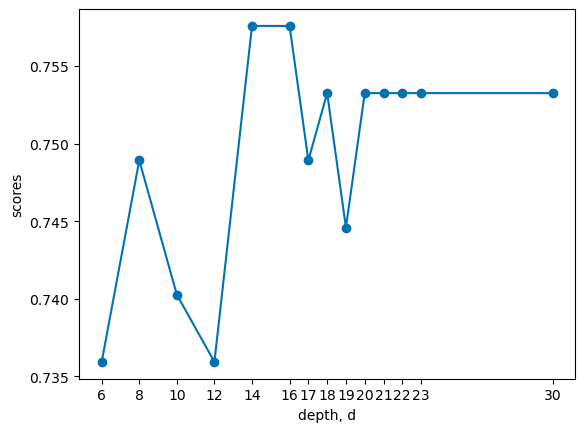

In [39]:
# checking depth for most accurate setting for the optimal model
#depth = range(6,25)
#Chose to use a list instead of a rnage
depth = [6, 8, 10, 12, 14, 16, 17, 18, 19, 20, 21, 22, 23, 30]
#Creates an empty list
scores = []
for d in depth:

    classifier=RandomForestClassifier(max_depth = d, random_state = 21)
    classifier=classifier.fit(X_train,y_train)
    score = classifier.score(X_test, y_test)
    scores.append(classifier.score(X_test, y_test))
    print("iteration {} done. Accuracy = ".format(d) + str(score))
    
plt.plot(depth, scores, '-o')
plt.xlabel('depth, d')
plt.ylabel('scores')
plt.xticks(depth)
plt.show()

In [40]:
#Optimal Model
# running radom forest model with max depth of 16 because it provided the maximum accuracy score. data may change when script is ran again.
vartrain = X_train
vartest = X_test
model = RandomForestClassifier(max_depth=16, random_state=21)
shorttraintest(vartrain, vartest, y_train, y_test, model)

Confusion Matrix:
[[122  29]
 [ 27  53]]

Accuracy Score: 0.7576
Recall Score: 0.6625
Precision Score: 0.6463


iteration 1 done. Accuracy = 0.7316017316017316
iteration 2 done. Accuracy = 0.7445887445887446
iteration 3 done. Accuracy = 0.7402597402597403
iteration 4 done. Accuracy = 0.7445887445887446
iteration 5 done. Accuracy = 0.7489177489177489
iteration 6 done. Accuracy = 0.7402597402597403
iteration 7 done. Accuracy = 0.7316017316017316
iteration 8 done. Accuracy = 0.7316017316017316
iteration 9 done. Accuracy = 0.7316017316017316
iteration 10 done. Accuracy = 0.7316017316017316
iteration 11 done. Accuracy = 0.7316017316017316
iteration 12 done. Accuracy = 0.7316017316017316
iteration 13 done. Accuracy = 0.7316017316017316
iteration 14 done. Accuracy = 0.7316017316017316
iteration 15 done. Accuracy = 0.7316017316017316
iteration 16 done. Accuracy = 0.7316017316017316
iteration 17 done. Accuracy = 0.7316017316017316
iteration 18 done. Accuracy = 0.7316017316017316
iteration 19 done. Accuracy = 0.7316017316017316
iteration 20 done. Accuracy = 0.7316017316017316
iteration 21 done. Accuracy =

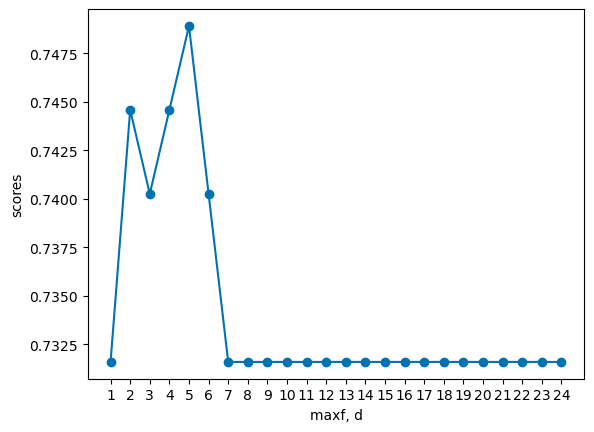

In [41]:
# running model to find max features
figsize=(20, 5)
maxf = range(1,25)
scores = []
for d in maxf:
    classifier=RandomForestClassifier(max_depth = 19, max_features = d, random_state=21)
    classifier=classifier.fit(X_train,y_train)
    score = classifier.score(X_test, y_test)
    scores.append(classifier.score(X_test, y_test))
    print("iteration {} done. Accuracy = ".format(d) + str(score))
    
plt.plot(maxf, scores, '-o')
plt.xlabel('maxf, d')
plt.ylabel('scores')
plt.xticks(maxf)
plt.show()

In [42]:
# running with set max features = 5 because it provided the highest accuracy score. data may change when script is ran again. 
vartrain = X_train
vartest = X_test
model = RandomForestClassifier(max_depth=17, max_features = 5, random_state=21)
shorttraintest(vartrain, vartest, y_train, y_test, model)

Confusion Matrix:
[[119  32]
 [ 26  54]]

Accuracy Score: 0.7489
Recall Score: 0.6750
Precision Score: 0.6279


iteration 1 done. Accuracy = 0.7229437229437229
iteration 20 done. Accuracy = 0.7532467532467533
iteration 50 done. Accuracy = 0.7575757575757576
iteration 100 done. Accuracy = 0.7316017316017316
iteration 150 done. Accuracy = 0.7445887445887446
iteration 500 done. Accuracy = 0.7402597402597403


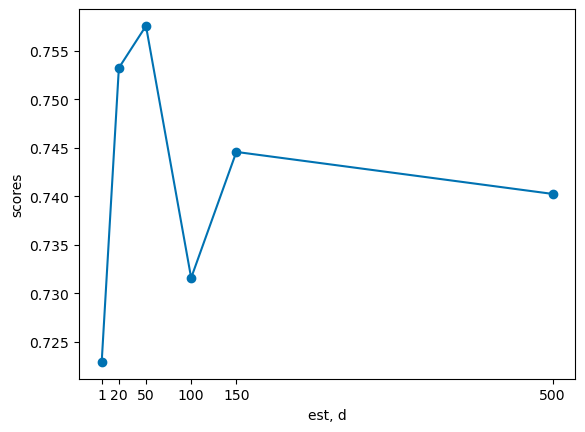

In [43]:
#CodeBlock Subsection 5.2
# running model to find n_estimators
figsize=(20, 5)
est = [1, 20, 50, 100, 150, 500]
scores = []

for d in est:
        classifier=RandomForestClassifier(max_depth = 19, max_features = 13, n_estimators = d, random_state=21)
        classifier=classifier.fit(X_train,y_train)
        score = classifier.score(X_test, y_test)
        scores.append(classifier.score(X_test, y_test))
        print("iteration {} done. Accuracy = ".format(d) + str(score))
                                          
plt.plot(est, scores, '-o')
plt.xlabel('est, d')
plt.ylabel('scores')
plt.xticks(est)
plt.show()

In [44]:
#Final Optimal Model
# running model with set parameters with n_estimators = 50 because it provided the highest accuracy score. data may change when whole script is ran.

model = RandomForestClassifier(max_depth=19, max_features = 13, n_estimators = 50, random_state=21)
shorttraintest(vartrain, vartest, y_train, y_test, model)

Confusion Matrix:
[[120  31]
 [ 25  55]]

Accuracy Score: 0.7576
Recall Score: 0.6875
Precision Score: 0.6395


# Finding Decision Model (RandomForest)

In [45]:

# checking class weight 
cw = [None, 'balanced', {0:1, 1:1.5}, {0:1, 1:2}, {0:1, 1:2.5}, {0:1, 1:3}, {0:1, 1:4}, {0:1, 1:4.5},{0:1, 1:5
}, {0:1, 1:5.5},{0:1, 1:10}, {0:1, 1:100}]

vartrain = X_train
vartest = X_test

for w in cw:
    print('----------------------')
    vartitle = "Model with Class Weight: " + str(w)
    varcw = w
    model = RandomForestClassifier(max_depth=19, max_features = 13, n_estimators = 100, class_weight=varcw,  random_state=21)
    print(vartitle)
    print('')
    shorttraintest(vartrain, vartest, y_train, y_test, model)
    print('----------------------')
    

----------------------
Model with Class Weight: None

Confusion Matrix:
[[117  34]
 [ 28  52]]

Accuracy Score: 0.7316
Recall Score: 0.6500
Precision Score: 0.6047
----------------------
----------------------
Model with Class Weight: balanced

Confusion Matrix:
[[123  28]
 [ 29  51]]

Accuracy Score: 0.7532
Recall Score: 0.6375
Precision Score: 0.6456
----------------------
----------------------
Model with Class Weight: {0: 1, 1: 1.5}

Confusion Matrix:
[[118  33]
 [ 27  53]]

Accuracy Score: 0.7403
Recall Score: 0.6625
Precision Score: 0.6163
----------------------
----------------------
Model with Class Weight: {0: 1, 1: 2}

Confusion Matrix:
[[123  28]
 [ 28  52]]

Accuracy Score: 0.7576
Recall Score: 0.6500
Precision Score: 0.6500
----------------------
----------------------
Model with Class Weight: {0: 1, 1: 2.5}

Confusion Matrix:
[[126  25]
 [ 29  51]]

Accuracy Score: 0.7662
Recall Score: 0.6375
Precision Score: 0.6711
----------------------
----------------------
Model with

In [46]:
#Decision Model For Random Forest
vartrain = X_train
vartest = X_test
model = RandomForestClassifier(max_depth=19, max_features = 13, n_estimators = 100, class_weight={0: 1, 1: 2}, random_state=21)
shorttraintest(vartrain, vartest, y_train, y_test, model)

Confusion Matrix:
[[123  28]
 [ 28  52]]

Accuracy Score: 0.7576
Recall Score: 0.6500
Precision Score: 0.6500


In [49]:
from sklearn.tree import DecisionTreeClassifier # to build a classification tree
from sklearn.model_selection import train_test_split # to split data into training and testing se
from sklearn.model_selection import cross_val_score # for cross validation
from sklearn.metrics import confusion_matrix, classification_report # to create a confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay # to draw a confusion matrix
from sklearn.tree import plot_tree # to draw a classification tree
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

In [51]:
#Set the parameters for the 6 models
model = [
#Logistic Regression - 3 models
(X_train, X_test, y_train,'log_opt','Logistic',
LogisticRegression(C=1000, penalty = 'l1', solver= 'saga', random_state=21)),
(X_train, X_test, y_train,'log_dec', 'Logistic',
LogisticRegression(C=10, class_weight = {0: 1, 1:2.5}, penalty = 'l1', solver = 'saga', random_state=21)),
#Decision Tree - 3 models
(X_train, X_test, y_train,'dt_opt', 'DecisionTree',
DecisionTreeClassifier(max_depth = 6, max_leaf_nodes = 36,class_weight={0: 1, 1: 5.5}, criterion = 'entropy', random_state = 21)),
(X_train, X_test, y_train,'dt_dec', 'DecisionTree',
DecisionTreeClassifier(max_depth = 5, max_leaf_nodes = 36,class_weight={0: 1, 1: 10}, criterion = 'entropy', random_state = 21)),
#Random Forest - 3 models
(X_train, X_test, y_train,'rf_opt', 'RandomForest',
RandomForestClassifier(max_depth = 19, max_features = 13,n_estimators = 50, class_weight= None , criterion = 'entropy', random_state=21)),
(X_train, X_test, y_train,'rf_dec', 'RandomForest',
RandomForestClassifier(max_depth = 19, max_features = 13,n_estimators = 50, class_weight={0: 1, 1: 2}, criterion = 'entropy', random_state=21)),
]
cm_all = pd.DataFrame(columns=['Model', 'Type','pred_nodiabetes', 'pred_diabetes',
'Score', 'Recall', 'Precision', 'F1'])
for tr, tst, yt, n, mod, m in model:

    m.fit(tr, yt)
    model_pred = m.predict(tst)
    model_prob = m.predict_proba(tst)
    score = m.score(tst, y_test)
    score_format = '{0:.4f}'.format(score)

    recall = recall_score(y_test, model_pred)
    recall_format = '{0:.4f}'.format(recall)

    f1 = f1_score(y_test, model_pred)    
    f1_format = '{0:.4f}'.format(f1)
    
    precision = precision_score(y_test, model_pred)    
    precision_format = '{0:.4f}'.format(precision)
    
    y_pred_prob = m.predict_proba(tst)[:,1]    
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    exec(f'fpr_{n} = fpr')
    exec(f'tpr_{n} = tpr')
    exec(f'thresholds_{n} = thresholds')
    exec(f'{n} = n')
    
    cm = pd.DataFrame(confusion_matrix(y_test, model_pred))
    cm=cm.rename(columns = {0:'pred_nodiabetes', 1:'pred_diabetes'})
    exec(f'cm_{n} = cm')
    cm['Model'] = mod
    cm['Type'] = n
    cm['Score'] = score_format
    cm['Recall'] = recall_format
    cm['Precision'] = precision_format
    cm['F1'] = f1_format
    cm_all = pd.concat([cm_all, cm], axis=0)
print(n + " - Score: " + str(score_format) + " - Recall: " +
str(recall_format) + " - Precision: " + str(precision_format) + " - F1: " +
str(f1_format))
print('----------------------------------------------------------------')
cm_all = cm_all.reset_index()
cm_all['index'] = np.where(cm_all['index']==0, 'no_diabetes', 'diabetes')
cm_all = cm_all.rename(columns={'index':'actual'})
display(cm_all)
print('--------------------------------------------------------------------')

rf_dec - Score: 0.7446 - Recall: 0.6375 - Precision: 0.6296 - F1: 0.6335
----------------------------------------------------------------


,actual,Model,Type,pred_nodiabetes,pred_diabetes,Score,Recall,Precision,F1
0,no_diabetes,Logistic,log_opt,129,22,0.6797,0.3500,0.5600,0.4308
1,diabetes,Logistic,log_opt,52,28,0.6797,0.3500,0.5600,0.4308
2,no_diabetes,Logistic,log_dec,59,92,0.5584,0.8750,0.4321,0.5785
3,diabetes,Logistic,log_dec,10,70,0.5584,0.8750,0.4321,0.5785
4,no_diabetes,DecisionTree,dt_opt,95,56,0.6926,0.8125,0.5372,0.6468
5,diabetes,DecisionTree,dt_opt,15,65,0.6926,0.8125,0.5372,0.6468
6,no_diabetes,DecisionTree,dt_dec,77,74,0.6364,0.8750,0.4861,0.6250
7,diabetes,DecisionTree,dt_dec,10,70,0.6364,0.8750,0.4861,0.6250
8,no_diabetes,RandomForest,rf_opt,123,28,0.7706,0.6875,0.6627,0.6748
9,diabetes,RandomForest,rf_opt,25,55,0.7706,0.6875,0.6627,0.6748


--------------------------------------------------------------------


In [ ]:
rf_predict_train = rf_model.predict(x_train)
# Training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, rf_predict_train)))

Wow! accuracy is 100%... Lets see what it does with the test data

Based on the chart, the most accurate for the optimal model random forest is when depth is set to 14 or 16. We'll go with 16 as depth.

### Predict Test Data

In [ ]:
rf_predict_test = rf_model.predict(x_test)
# Test metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, rf_predict_test)))

In [ ]:
print(metrics.confusion_matrix(y_test, rf_predict_test))
print("")
print("Classification Report")
print(metrics.classification_report(y_test, rf_predict_test))

Fitting Training data can be very complex formula y = x1 + w2x2^3 + w3x3^8 to fit the decision boundat

This a classic overfit problem... it shows up in the test dataset

To fix the over fitting problem one can use the Regularization hyperparameter to avoid a perfext fitting on the boundary line
y = x1 + w2x2^3 + w3x3^8 - f(W)/&(Lambda)

Cross Validation - Done using different test datasets

Bias - variance trade-off  (compromise in machine learning algorithms)

We need to Sacrifice some perfection for better overall performance

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(C=0.7, class_weight="balanced", random_state=42, max_iter=500)
lr_model.fit(x_train, y_train.ravel())
lr_predict_test = lr_model.predict(x_test)

# training metrics
print("ASccuracy: {0:.4f}".format(metrics.accuracy_score(y_test, lr_predict_test)))
print(metrics.confusion_matrix(y_test, lr_predict_test))
print("")
print("Classification Report")
print(metrics.classification_report(y_test, lr_predict_test))

#### Setting the regularization paramter

In [ ]:
C_start = 0.1
C_end = 5
C_inc = 0.1

C_values, recall_scores = [], []

C_val = C_start
best_recall_score = 0
while (C_val < C_end):
    C_values.append(C_val)
    lr_model_loop = LogisticRegression(C=C_val, class_weight="balanced", random_state=42, max_iter=1000)
    lr_model_loop.fit(x_train, y_train.ravel())
    lr_predict_loop_test = lr_model_loop.predict(x_test)
    recall_score = metrics.recall_score(y_test, lr_predict_loop_test)
    recall_scores.append(recall_score)
    if (recall_score > best_recall_score):
        best_recall_score = recall_score
        best_lr_predict_test = lr_predict_loop_test
    
    C_val = C_val + C_inc

best_score_C_val = C_values[recall_scores.index(best_recall_score)]
print("lst max value of {0:.3f} occured at C={1:.3f}".format(best_recall_score, best_score_C_val))

%matplotlib inline
plt.plot(C_values, recall_scores, "-")
plt.xlabel("C value")
plt.ylabel("recall score")

Unbalanced classes can cause the issue we are seeing:
More of one class than the others
Our Data - 65% No Diabetes, 35% Diabetes
Can be causing biases estimation yielding poor prediction results

In [ ]:
# training metrics
print("ASccuracy: {0:.4f}".format(metrics.accuracy_score(y_test, lr_predict_test)))
print(metrics.confusion_matrix(y_test, lr_predict_test))
print("")
print("Classification Report")
print(metrics.classification_report(y_test, lr_predict_test))

### Splitting the data to enable Cross Validation

Split data in Training, Validation and Testing
50% Training
25% Validation
25% Testing

Another and better approach is to use K-fold Cross Validation
for example: use 70 % training and 30% for Testing
Divide the Training dataset into 10 folds
use the 1st Fold as validation for iteration 1
use the second Fold for validaion for iteration 2
and so forth

### LogisticRegressionCV    - Cross Validation(CV)

In [ ]:
from sklearn.linear_model import LogisticRegressionCV
lr_cv_model = LogisticRegressionCV(n_jobs=-1, random_state=42, Cs=3, cv=10, refit=False, class_weight="balanced")
lr_cv_model.fit(x_train, y_train.ravel())

### Predict on test data

In [ ]:
lr_cv_predict_test = lr_cv_model.predict(x_test)

# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, lr_cv_predict_test)))
print(metrics.confusion_matrix(y_test, lr_cv_predict_test))
print("")
print("Classification Report")
print(metrics.classification_report(y_test, lr_cv_predict_test))